In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

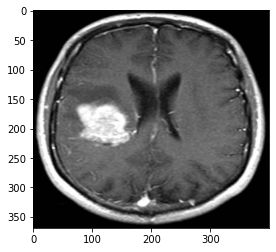

In [3]:
image = cv.imread('image/Y11.jpg')
image = cv.cvtColor(image , cv.COLOR_BGR2GRAY)
plt.imshow(image , cmap='gray')

Image Preprocessing dan Image Enhancement

Median Filter

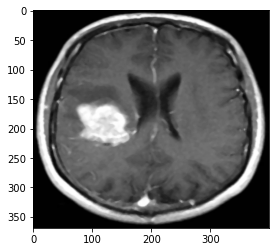

In [107]:
median = cv.medianBlur(image , 5)
plt.imshow(median , cmap='gray')

Histogram Equalization

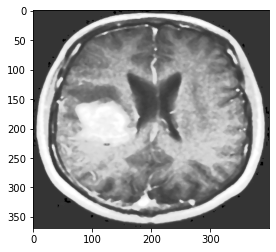

In [108]:
histogram_equlization = cv.equalizeHist(median)
plt.imshow(histogram_equlization , cmap='gray')

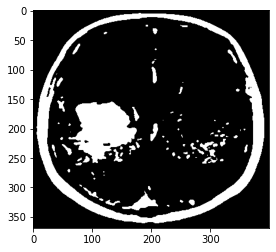

In [157]:
(T, thresh) = cv.threshold(histogram_equlization, 210, 255, cv.THRESH_BINARY)
plt.imshow(thresh , cmap='gray')

# ret2,th2 = cv.threshold(histogram_equlization,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plt.imshow(th2 , cmap='gray')

Morphological Operation

Opening untuk menghapus noise di gambar

In [121]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

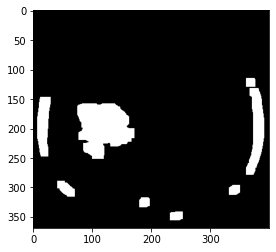

In [165]:
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel , iterations=3)
plt.imshow(opening , cmap='gray')

Closing untuk menghapus bolongan kecil atau menggabungkan objek jika ditengah ditengah ada sebuah bolongan

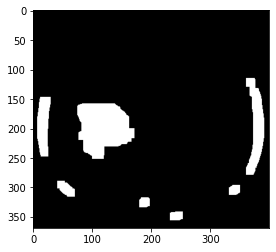

In [166]:
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel , iterations=3)
plt.imshow(closing , cmap='gray')

In [167]:
def auto_canny(image, sigma=0.33):
     # compute the median of the single channel pixel intensities
     v = np.median(image)

    # apply automatic Canny edge detection using the computed median
     lower = int(max(0, (1.0 - sigma) * v))
     upper = int(min(255, (1.0 + sigma) * v))
     edged = cv.Canny(image, lower, upper)

    # return the edged image
     return edged

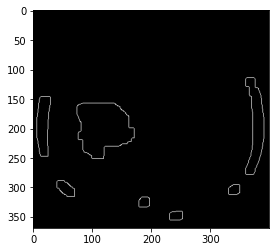

In [168]:
canny_detection = auto_canny(closing)
plt.imshow(canny_detection , cmap='gray')

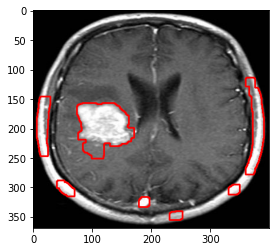

In [106]:
(cnts, _) = cv.findContours(canny_detection ,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
result_image = cv.cvtColor(image , cv.COLOR_GRAY2RGB)
result_image  = cv.drawContours(result_image, cnts, -1, (255, 0, 0), 2)
plt.imshow(result_image)

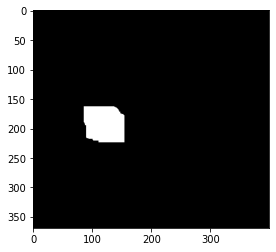

In [19]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 5))
closed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
closed = cv.erode(closed, None, iterations = 14)
closed = cv.dilate(closed, None, iterations = 13)
plt.imshow(closed , cmap='gray')

In [20]:
def auto_canny(image, sigma=0.33):
     # compute the median of the single channel pixel intensities
     v = np.median(image)

    # apply automatic Canny edge detection using the computed median
     lower = int(max(0, (1.0 - sigma) * v))
     upper = int(min(255, (1.0 + sigma) * v))
     edged = cv.Canny(image, lower, upper)

    # return the edged image
     return edged

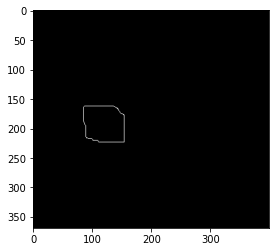

In [21]:
canny = auto_canny(closed)
plt.imshow(canny , cmap='gray')

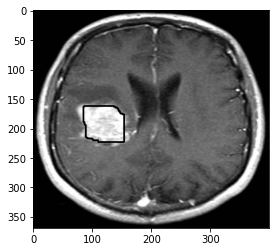

In [22]:
(cnts, _) = cv.findContours(canny ,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
result  = cv.drawContours(image_copy, cnts, -1, (0, 0, 255), 2)
plt.imshow(result , cmap='gray')